# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
np.random.seed(5)
%matplotlib inline

#設定 模型 估計參數
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=6)

In [3]:
#數據前處理
pca.fit(X)  #PCA訓練
X = pca.transform(X) #轉換

print("Data shape before PCA : ",digits.data.shape)
print("Data shape after PCA : ",X.shape)


Data shape before PCA :  (537, 64)
Data shape after PCA :  (537, 6)


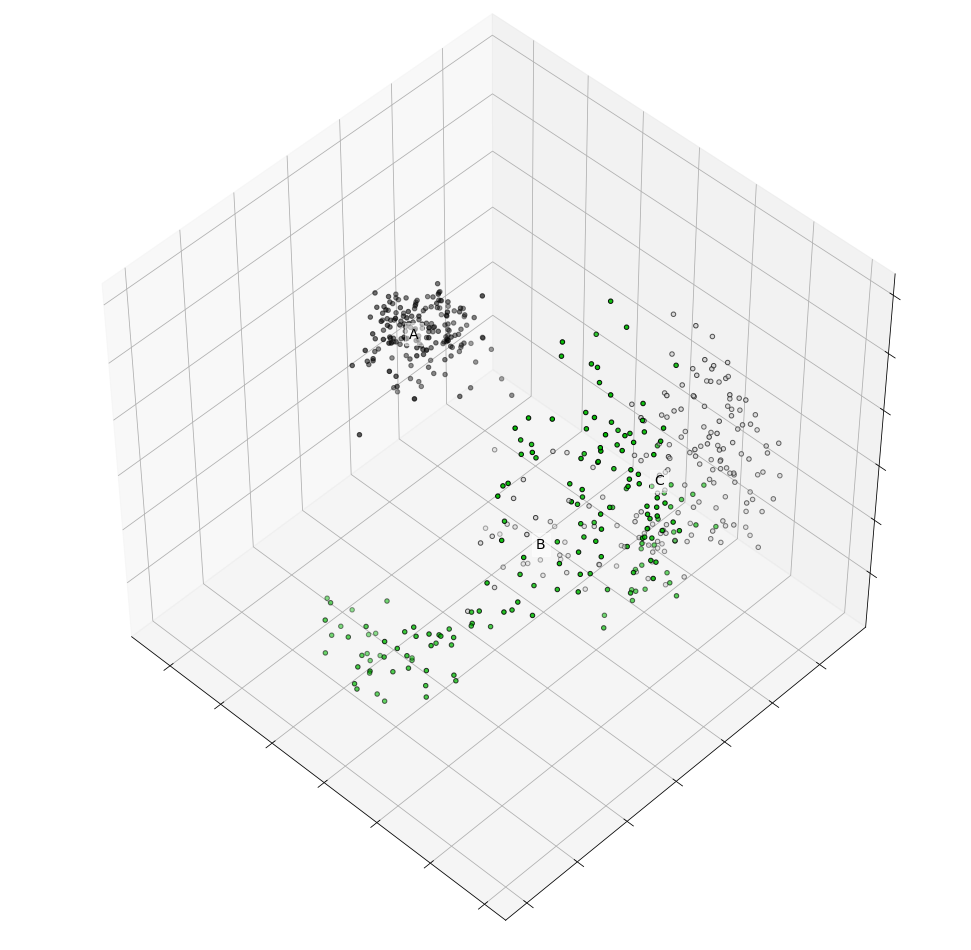

In [4]:
fig = plt.figure(1, figsize=(14,13))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev= 48 , azim= 134)  #rect :axes position.
plt.cla()

#cla()   # Clear axis 当前活动轴在当前图中。 它保持其他轴不变。
#clf()   # Clear figure 清除整个当前数字。与所有的轴，但离开窗口打开，这样它就可以再用在其他的 plots上了。
#close() # Close a figure window 如果未另指定，则该窗口将是当前窗口。


for name, label in [('A', 0), ('B', 1), ('C', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',fontsize =14,
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [0, 1, 2]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()